In [1]:
import os
import glob
import re
import seaborn as sns
import numpy as np
import pandas as pd
from os.path import join
import matplotlib.pyplot as plt
from pandas import (
    Series,
    DataFrame, 
    set_option
    )
from dataset import Dataset
from params import get_params
set_option("display.max_columns",150)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/pierredelice/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
params = get_params()
dataset = Dataset(params)
df = dataset.get_data()
#bd.to_pickle('~/Documents/GitHub/Defunción/data/bd.pkl', sep=',', index=False, header=True)
bd = df.copy()

In [3]:
#Sample data
bd = bd.sample(frac=0.1)

In [4]:
RE_SUSPICIOUS = re.compile(r'[&#<>{}\[\]\\]')

def impurity(text, min_len=10):
    """returns the share of suspicious characters in a text""" 
    if text == None or len(text) < min_len:
        return 0 
    else:
        return len(RE_SUSPICIOUS.findall(text))/len(text)


In [5]:
from nltk.tokenize import word_tokenize
bd['length'] = bd['nombre'].str.len()
bd['tokens'] = bd['nombre'].apply(word_tokenize)
#length of names
bd['tokens_len'] = bd['tokens'].str.len()
#bd['tokens_len'] = [len(elt.split()) for elt in bd['nombre']]
bd['tokens_len'] = bd['tokens_len'].astype('int8')
#Sexo
bd['sexo'] = bd.sexo.replace((0,9),np.nan)
#edad
bd['edad'] = bd.edad.replace((888,999),np.nan)
bd['edad_est'] = round(((bd['fec_def'] - bd['fec_nac']))/ np.timedelta64(1, 'Y'),0)

# add new column to data frame
bd['impurity'] = bd['nom_c'].apply(impurity, min_len=5)
# get the top 3 records
#bd[['nom_c', 'impurity']].sort_values(by='impurity', ascending=False).head(3)

In [6]:
#bd.describe(include='O').T
bd.describe().T

,count,mean,std,min,25%,50%,75%,max
sexo,892234.0,1.438075e+00,4.961507e-01,1.0,1.0,1.0,2.0,2.0
edad_c,893368.0,4.939336e+00,4.155515e-01,0.0,5.0,5.0,5.0,9.0
edad,891388.0,6.371354e+01,2.268987e+01,0.0,52.0,68.0,81.0,122.0
res_ent,893368.0,1.700962e+01,9.829474e+00,0.0,10.0,15.0,23.0,99.0
res_mun,893368.0,1.706784e+04,9.880731e+03,0.0,10012.0,15081.0,23004.0,99999.0
res_loc,893368.0,1.706787e+08,9.880768e+07,0.0,100120001.0,150810001.0,230040184.0,999999999.0
afiliacion,893368.0,9.741704e+00,2.469554e+01,0.0,1.0,2.0,7.0,99.0
edo_civil,893368.0,3.605030e+00,2.163810e+00,0.0,2.0,4.0,5.0,9.0
escolar,893368.0,3.811424e+01,2.745001e+01,0.0,31.0,32.0,51.0,122.0
def_ent,893368.0,1.651658e+01,8.259516e+00,0.0,9.0,15.0,22.0,99.0


In [7]:
bd.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 893368 entries, 237130 to 119224
Data columns (total 26 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   nom_c       893368 non-null  object        
 1   sexo        892234 non-null  float64       
 2   edad_c      893368 non-null  uint32        
 3   edad        891388 non-null  float64       
 4   res_ent     893368 non-null  uint32        
 5   res_mun     893368 non-null  uint32        
 6   res_loc     893368 non-null  uint32        
 7   curp        743420 non-null  category      
 8   afiliacion  893368 non-null  uint32        
 9   edo_civil   893368 non-null  uint32        
 10  escolar     893368 non-null  uint32        
 11  ocupacion   882295 non-null  category      
 12  def_ent     893368 non-null  uint32        
 13  def_mun     893368 non-null  uint32        
 14  def_loc     893368 non-null  category      
 15  causa_bas   891934 non-null  category      
 1

In [ ]:
bd[bd['nombre'].str.contains('juan')]['nombre'].value_counts()

In [ ]:
bd[['length','tokens_len']].plot(kind='box', vert = False)
plt.title('Length of tokens and names')
filename = 'box_length.png'
filename = join(
    params["path"]+params["path graphics"],
    filename
)
plt.savefig(filename)

<AxesSubplot: ylabel='Frequency'>

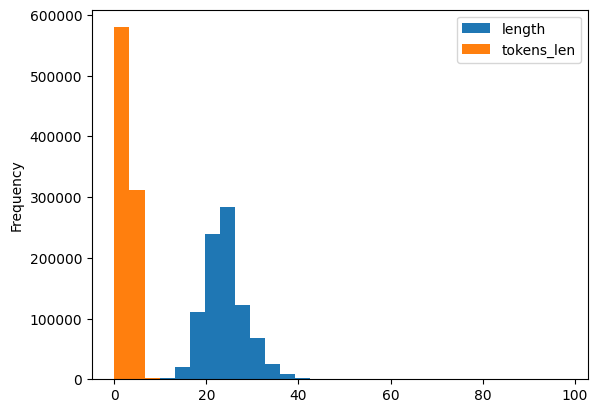

In [ ]:
bd[['length','tokens_len']].plot(kind='hist', bins=30)

In [ ]:
from nltk import word_tokenize, pos_tag, ne_chunk
#bd['nombre'] = bd['nombre'].astype('object')

tokens = word_tokenize(str(bd['nombre']))
pos_tags = pos_tag(tokens)
named_entities = ne_chunk(pos_tags)
print(named_entities)

In [ ]:
pd.crosstab(bd.tokens_len,bd.base)

base,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
tokens_len,,,,,,,,,,,,,
0,2361,2675,2653,227,35,220,251,282,157,203,272,272,87
1,15,37,16,16,12,2,4,5,508,477,404,225,46
2,59,77,49,53,79,40,25,35,277,272,295,168,53
3,35969,35750,35966,39311,40491,41456,43129,43303,42889,46465,67333,69815,25075
4,14130,14663,15131,16629,17202,17942,19311,20050,20302,21540,32166,33575,12378
5,2593,2646,2759,3014,2977,3200,3306,3283,3445,3676,5281,5368,1986
6,811,764,807,853,912,964,941,1036,991,1006,1434,1602,572
7,114,115,114,135,130,135,140,135,132,124,174,212,73
8,32,25,25,36,33,26,27,25,21,18,40,41,17


In [ ]:
#bd.groupby('base').res_ent.value_counts()
pd.crosstab(bd.res_ent, bd.base)

base,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
res_ent,,,,,,,,,,,,,
0,0,0,0,177,201,132,175,212,146,105,67,69,40
1,498,497,525,604,558,576,632,637,658,693,1064,931,412
2,1471,1495,1438,1550,1567,1648,1735,1811,1810,2159,3230,2739,1094
3,240,242,265,302,257,307,334,399,314,356,476,580,202
4,369,345,379,411,377,472,475,497,483,559,768,732,301
5,1030,1124,1349,1419,1549,1575,1670,1599,1793,1802,2978,2356,1154
6,278,308,355,387,361,455,432,439,475,477,575,739,253
7,1872,1780,1922,2132,2370,2535,2569,2627,2632,2694,3834,3907,1481
8,2136,2323,2057,2039,2126,2218,2277,2307,2356,2476,3747,3189,1337


In [ ]:
bd.loc[ [bd.edad.idxmin(),df.edad.idxmax()],
    ['sexo','edad','edad_c','fec_nac', 'fec_def']
    ]

,sexo,edad,edad_c,fec_nac,fec_def
1211,1.0,0.0,2,2011-04-14,2011-04-14
1211,2.0,46.0,1,2016-11-04,2016-11-04
1389,1.0,NaN,1,2016-11-15,2016-11-15
1389,2.0,59.0,1,2014-01-14,2014-01-14


<AxesSubplot: title={'center': 'Number of deaths per year'}, xlabel='base'>

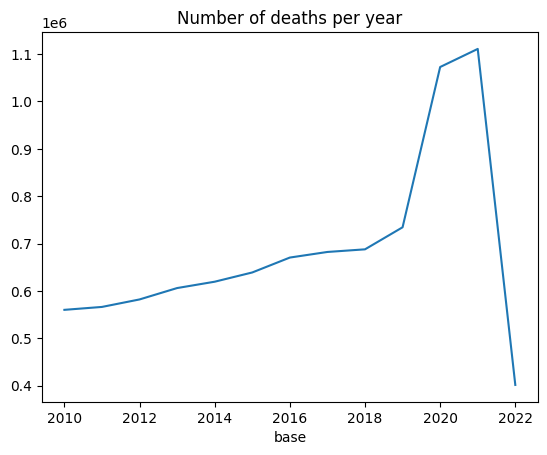

In [ ]:
df.groupby('base').size().plot(title="Number of deaths per year")

#df.groupby('base').agg({'sexo': 'sum'}) \
# .plot(title="Avg. Speech Length", ylim=(0,30000))

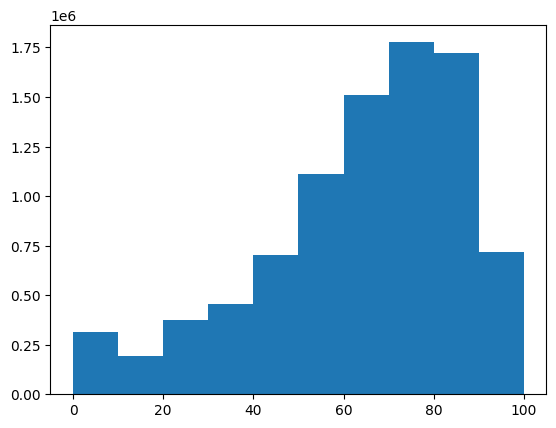

In [ ]:
plt.hist(df['edad'], range=(0,100), bins=10)
filename = 'edad.png'
filename = join(
    params["path"]+params["path graphics"],
    filename
)
plt.savefig(filename)

/var/folders/f7/cfmwg9550852tgnwq3tw36vr0000gn/T/ipykernel_1349/3024593917.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


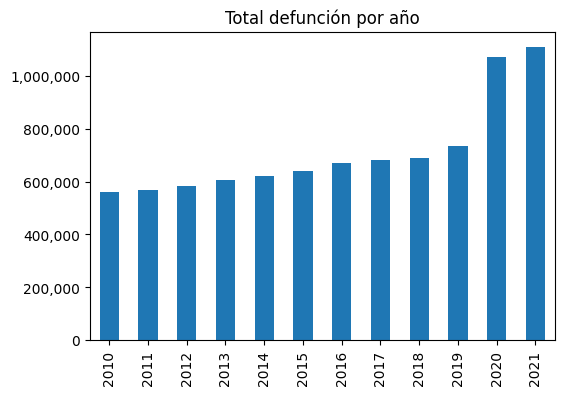

In [ ]:
df.loc[df['base']<= 2021]['base'].value_counts().sort_index().plot(kind='bar', figsize=(6,4))
plt.title("Total defunción por año")
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

filename = "def_anio.png"
filename = join(
    params["path"]+params["path graphics"],
    filename
)
plt.savefig(filename)
#plt.show();

In [ ]:
bd[['nombre','nom_c','sexo','edad','fec_nac','curp','res_ent','res_mun','res_loc','base']].sort_values(['fec_nac'])

In [ ]:
curp_extract = re.compile(r'\d{6}')
#\d{6}
def extract(text, min_length=10):
    if text==None or len(text) < min_length:
        return None
    else:
        return ''.join(curp_extract.findall(text))

bd['curp_fecnac'] = bd['curp'].apply(extract, min_length=10)
bd.loc[bd['curp_fecnac'] >='888888'] = np.nan

In [ ]:
bd.loc[bd['curp_fecnac'] >='888888']

,nom_c,sexo,edad_c,edad,res_ent,res_mun,res_loc,curp,afiliacion,edo_civil,escolar,ocupacion,def_ent,def_mun,def_loc,causa_bas,base,fec_nac,fec_def,miscol,nombre,length,tokens,tokens_len,edad_est,impurity,curp_fecnac


In [ ]:
bd[['edad','fec_nac','curp','curp_fecnac','base']][bd['curp_fecnac'].notnull() & bd['fec_nac'].isna()]

,edad,fec_nac,curp,curp_fecnac,base
528791,83.0,NaT,NO ESPECIFICADO,,2016.0
605971,NaN,NaT,NO ESPECIFICADO,,2013.0
196639,57.0,NaT,NO ESPECIFICADO,,2013.0
619475,NaN,NaT,NO ESPECIFICADO,,2014.0
637994,NaN,NaT,NO ESPECIFICADO,,2015.0
...,...,...,...,...,...
78654,31.0,NaT,NO ESPECIFICADO,,2017.0
605837,NaN,NaT,NO ESPECIFICADO,,2013.0
638931,NaN,NaT,NO ESPECIFICADO,,2015.0
373258,72.0,NaT,NO ESPECIFICADO,,2016.0


In [ ]:
pd.crosstab(bd.edad,bd.base)

base,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0,2022.0
edad,,,,,,,,,,,,,
0.0,37,34,32,0,0,0,0,0,0,0,0,0,0
1.0,793,775,759,712,658,667,619,640,156,176,160,181,108
2.0,564,529,543,587,494,512,492,462,114,106,111,125,59
3.0,326,390,349,377,336,311,339,357,78,92,72,67,36
4.0,281,281,271,271,261,263,255,239,74,72,66,74,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...
117.0,0,0,0,1,0,0,0,0,0,0,1,3,0
118.0,0,0,0,0,0,0,0,0,0,1,2,4,0
119.0,0,0,0,0,0,0,0,0,0,0,1,8,1


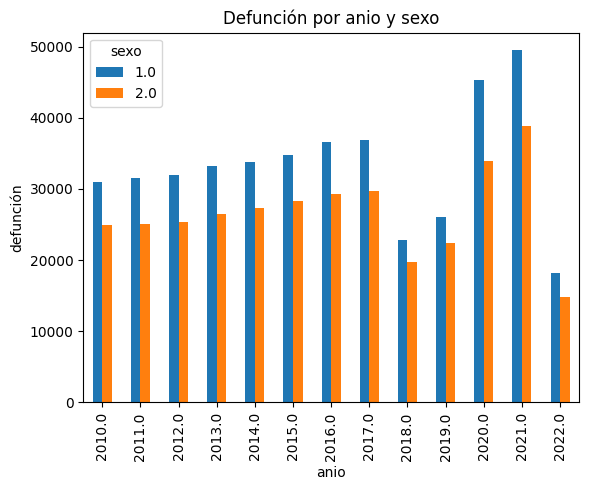

In [ ]:
pd.crosstab(bd.base,bd.sexo).plot(kind='bar')
plt.title('Defunción por anio y sexo')
plt.xlabel('anio')
plt.ylabel('defunción')

filename = 'sexo.png'
filename = join(
    params["path"]+params["path graphics"],
    filename
)
plt.savefig(filename)

In [ ]:
bins = [0,4,9,14,19,24,29,34,39,44,49,
        54,59,64,69,74,79,84,89,94,120]
labels = ['0-4','5-9','10-14','15-19',
        '20-24','25-29','30-34','35-39',
        '40-44','45-49','50-54','54-59',
        '60-64','65-69','70-74','75-79',
        '80-84','85-89','90-94', '95+']
bd['agerange'] = pd.cut(bd.edad, bins, labels = labels,include_lowest = True)


In [ ]:
pyramid = pd.crosstab(bd.agerange,bd.sexo).reset_index()
pyramid = pyramid.rename(columns={1:'Masculino',2:'Femenino','agerange':'age'})
#pyramid = pyramid.set_index('agerange')
pyramid['Masculino'] = pyramid['Masculino']/(-1000)
pyramid['Femenino'] = pyramid['Femenino']/(1000)
ages = pyramid.reset_index()['age'].sort_values(ascending=False).to_list()

In [ ]:
pyramid

sexo,age,Masculino,Femenino
0,0-4,-9.214,7.472
1,5-9,-4.448,3.573
2,10-14,-3.353,2.445
3,15-19,-6.095,2.809
4,20-24,-6.920,2.272
5,25-29,-7.557,2.512
6,30-34,-11.692,4.289
7,35-39,-15.284,6.125
8,40-44,-18.307,8.763
9,45-49,-22.408,12.529


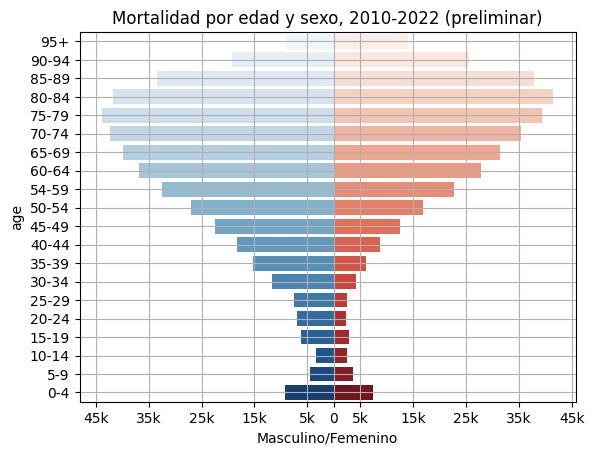

In [ ]:
ax1 = sns.barplot(x='Masculino', y='age', data=pyramid, order=ages, palette="Blues")
ax2 = sns.barplot(x='Femenino', y='age', data=pyramid, order=ages, palette="Reds")

plt.title("Mortalidad por edad y sexo, 2010-2022 (preliminar)")
plt.xlabel("Masculino/Femenino")
plt.grid()
plt.xticks(ticks=[-45,-35,-25,-15,-5,0,5,15,25,35,45],
labels=['45k','35k','25k','15k','5k',0,'5k','15k','25k','35k','45k'])

filename = 'mort_age.png'
filename = join(params['path']+params['path graphics'],filename)
plt.savefig(filename)